# 📊 Udemy Courses Exploratory Data Analysis (EDA)

## 📌 Project Overview
Online learning platforms like Udemy host thousands of courses across different domains, price ranges, and difficulty levels.  
Understanding what factors influence enrollments, pricing, and popularity can help instructors and businesses make data-driven decisions.

In this project, we perform **Exploratory Data Analysis (EDA)** on Udemy course data to uncover patterns related to course pricing, enrollments, ratings, and content structure.

---

## 🎯 Objective
The main objectives of this analysis are:
- To explore and understand the structure of Udemy course data
- To clean and preprocess raw data for analysis
- To analyze the relationship between course price and enrollments
- To derive meaningful insights that can guide course creation and pricing strategies

---

## 📂 Dataset Information
- Dataset Name: Udemy Courses Dataset
- Source: Public Udemy course data
- Contains information such as:
  - Course title and subject
  - Price and price category
  - Number of subscribers (enrollments)
  - Number of lectures and course duration
  - Course level and content type

---

## ⚙️ Tools & Libraries Used
- **Python**
- **Pandas & NumPy** for data manipulation
- **Matplotlib & Seaborn** for visualization
- **Jupyter Notebook** for interactive analysis

---

## 🔍 Analysis Workflow
1. Import required libraries
2. Load and inspect the dataset
3. Data cleaning and preprocessing
4. Feature transformation and categorization
5. Exploratory data analysis (EDA)
6. Insights and conclusions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

CSV_PATH = Path(r"udemy_courses.csv")  # change if needed
assert CSV_PATH.exists(), f"CSV not found at {CSV_PATH}. Upload your file and re-run."
df = pd.read_csv(CSV_PATH)
orig_len = len(df)
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792,923,274,NaN,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95.0,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200.0,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


## 1) Basic structure & cleaning

In [2]:
# Standardize column names
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

# Try parsing date columns commonly used in Udemy datasets
for col in ['published_timestamp', 'published_time', 'published_at', 'published_date', 'timestamp']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Identify key columns by common names
name_cols = [c for c in df.columns if c in ['course_title','title']]
rating_cols = [c for c in df.columns if c in ['rating','avg_rating','average_rating']]
enroll_cols = [c for c in df.columns if c in ['num_subscribers','enrolled','enrollments']]
price_cols = [c for c in df.columns if c in ['price','price_usd','list_price']]
lecture_cols = [c for c in df.columns if c in ['num_lectures','lectures']]
content_cols = [c for c in df.columns if c in ['content_duration','content_length','hours','duration_hours']]
paid_flag_cols = [c for c in df.columns if c in ['is_paid','paid','free']]
level_cols = [c for c in df.columns if c in ['level','course_level']]
cat_cols = [c for c in df.columns if c in ['subject','category','main_category']]

print('Detected columns:')
print({'title': name_cols, 'rating': rating_cols, 'enrollments': enroll_cols, 'price': price_cols,
       'lectures': lecture_cols, 'content': content_cols, 'is_paid': paid_flag_cols, 'level': level_cols,
       'category': cat_cols})

# Basic info
display(df.sample(min(5, len(df))))
display(df.describe(include='all').transpose())

# Missing values
na = df.isna().sum().sort_values(ascending=False)
na = na[na>0]
na

Detected columns:
{'title': ['course_title'], 'rating': [], 'enrollments': ['num_subscribers'], 'price': ['price'], 'lectures': ['num_lectures'], 'content': ['content_duration'], 'is_paid': ['is_paid'], 'level': ['level'], 'category': ['subject']}


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
1970,552650,Beginner Piano,https://www.udemy.com/beginner-piano/,True,20.0,776,79,89,Beginner Level,4.0,2015-08-05 00:29:09+00:00,Musical Instruments
2344,932842,Piano Lesson Variety,https://www.udemy.com/piano-lesson-variety/,True,40.0,59,1,28,Intermediate Level,4.0,2016-08-18 22:00:29+00:00,Musical Instruments
2948,686764,Learn Plugin Development in WordPress By Build...,https://www.udemy.com/learn-plugin-development...,True,60.0,1313,121,62,All Levels,11.0,2016-01-11 18:19:15+00:00,Web Development
94,474928,Intermediate Options trading concepts for Stoc...,https://www.udemy.com/intermediate-options-tra...,True,40.0,2000,30,9,All Levels,1.0,2015-04-13 20:28:04+00:00,Business Finance
3128,595818,Laravel Account Activation Project,https://www.udemy.com/laravel-account-activati...,True,50.0,1147,19,19,All Levels,2.5,2016-12-07 20:41:15+00:00,Web Development


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
course_id,3678.0,NaN,NaN,NaN,675971.963295,8324.0,407692.5,687917.0,961355.5,1282064.0,343273.15604
course_title,3678,3663,Creating an animated greeting card via Google ...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
url,3678,3672,https://www.udemy.com/understanding-financial-...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_paid,3678,2,True,3368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,3673.0,NaN,NaN,NaN,66.139396,0.0,20.0,45.0,95.0,200.0,60.998537
num_subscribers,3678.0,NaN,NaN,NaN,3197.150625,0.0,111.0,911.5,2546.0,268923.0,9504.11701
num_reviews,3678.0,NaN,NaN,NaN,156.259108,0.0,4.0,18.0,67.0,27445.0,935.452044
num_lectures,3678.0,NaN,NaN,NaN,40.108755,0.0,15.0,25.0,45.75,779.0,50.383346
level,3675,4,All Levels,1926,NaN,NaN,NaN,NaN,NaN,NaN,NaN
content_duration,3675.0,NaN,NaN,NaN,4.097392,0.0,1.0,2.0,4.5,78.5,6.055466


price               5
level               3
content_duration    3
dtype: int64

In [3]:
# Duplicates by title if available, else generic
dup_count = 0
if name_cols:
    dup_count = df.duplicated(subset=name_cols[0]).sum()
else:
    dup_count = df.duplicated().sum()
print(f'Duplicates found: {dup_count} of {orig_len}')
df = df.drop_duplicates(subset=name_cols[0] if name_cols else None)
print(f'After dedup: {len(df)} rows')

Duplicates found: 15 of 3678
After dedup: 3663 rows


## 2) Distributions & outliers

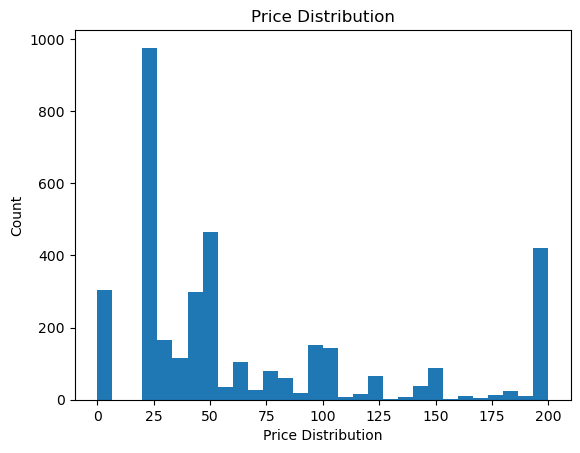

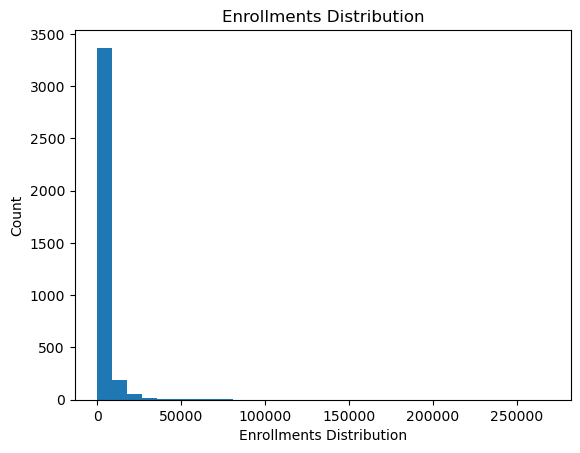

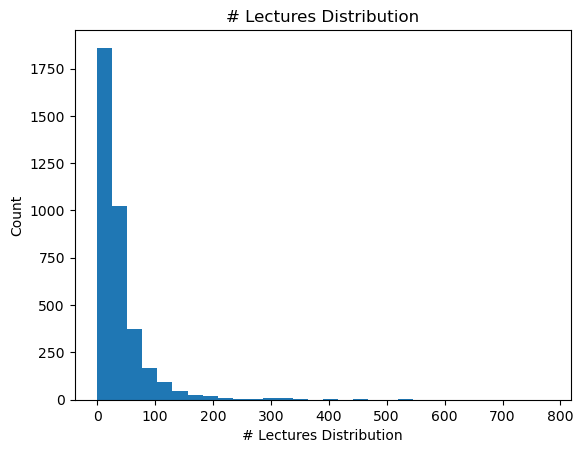

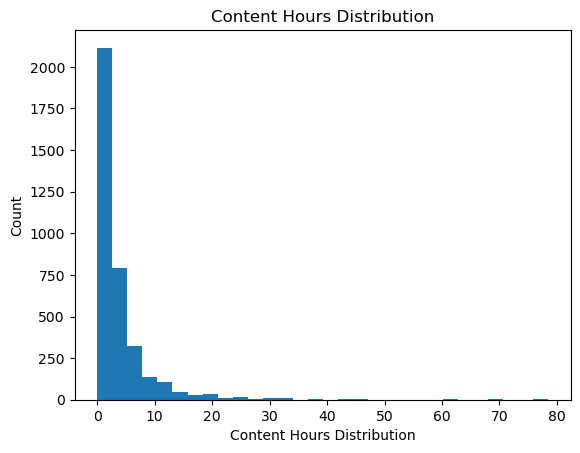

In [4]:
# Helper to plot histograms safely
def safe_hist(series, title, bins=30):
    series = pd.to_numeric(series, errors='coerce')
    series = series.replace([np.inf, -np.inf], np.nan).dropna()
    if series.empty:
        print(f'No numeric data for {title}')
        return
    plt.figure()
    plt.hist(series, bins=bins)
    plt.title(title)
    plt.xlabel(title)
    plt.ylabel('Count')
    plt.show()

for cols, label in [(price_cols,'Price'), (rating_cols,'Rating'), (enroll_cols,'Enrollments'),
                    (lecture_cols,'# Lectures'), (content_cols,'Content Hours')]:
    if cols:
        safe_hist(df[cols[0]], f'{label} Distribution')

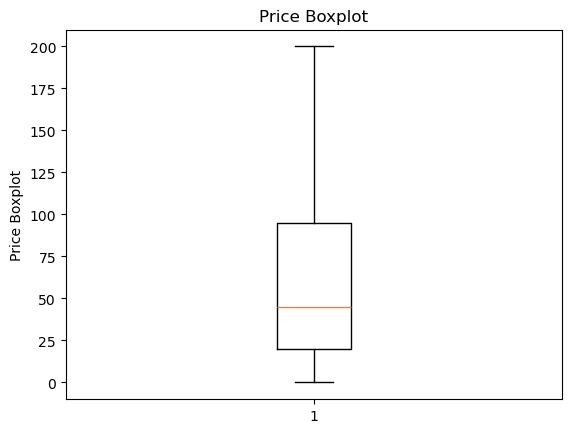

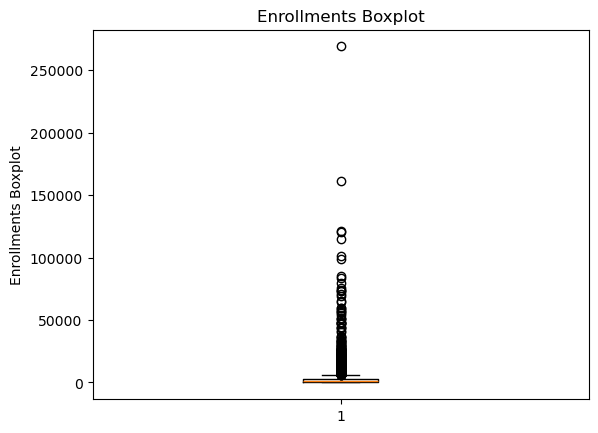

In [5]:
# Boxplots for key metrics (if present)
def safe_box(series, title):
    series = pd.to_numeric(series, errors='coerce')
    series = series.replace([np.inf, -np.inf], np.nan).dropna()
    if series.empty:
        print(f'No numeric data for {title}')
        return
    plt.figure()
    plt.boxplot(series)
    plt.title(title)
    plt.ylabel(title)
    plt.show()

for cols, label in [(price_cols,'Price'), (rating_cols,'Rating'), (enroll_cols,'Enrollments')]:
    if cols:
        safe_box(df[cols[0]], f'{label} Boxplot')

## 3) Popularity by category

In [6]:
import pandas as pd
if cat_cols and enroll_cols:
    pop = (df.groupby(cat_cols[0])[enroll_cols[0]]
             .sum()
             .sort_values(ascending=False)
             .reset_index())
    display(pop.head(20))
else:
    print('Category or enrollment columns not found')

,subject,num_subscribers
0,Web Development,7915677
1,Business Finance,1868711
2,Graphic Design,1061829
3,Musical Instruments,845126


## 4) Feature impact on enrollments & ratings

In [7]:
# Correlations
num_cols = []
for cols in [price_cols, rating_cols, enroll_cols, lecture_cols, content_cols]:
    if cols:
        num_cols.append(cols[0])
num_df = df[num_cols].apply(pd.to_numeric, errors='coerce') if num_cols else pd.DataFrame()
display(num_df.corr() if not num_df.empty else 'No numeric columns detected')

,price,num_subscribers,num_lectures,content_duration
price,1.000000,0.055533,0.329215,0.292237
num_subscribers,0.055533,1.000000,0.158616,0.162349
num_lectures,0.329215,0.158616,1.000000,0.801853
content_duration,0.292237,0.162349,0.801853,1.000000


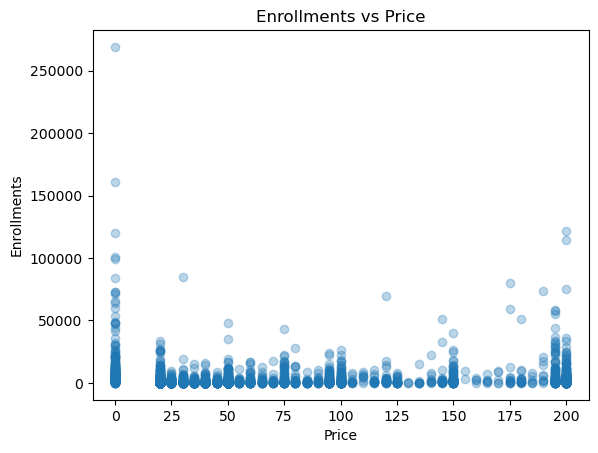

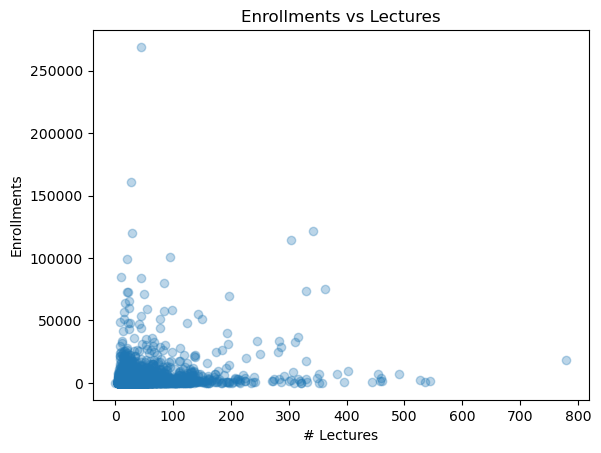

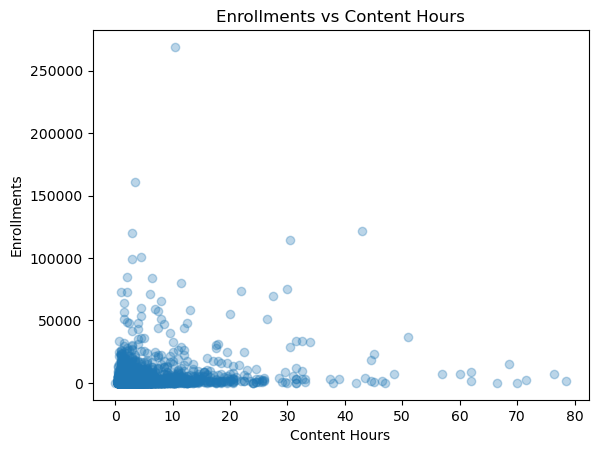

In [8]:
# Simple scatter relationships (each one in its own plot)
def safe_scatter(x, y, xlabel, ylabel, title):
    x = pd.to_numeric(x, errors='coerce')
    y = pd.to_numeric(y, errors='coerce')
    m = x.notna() & y.notna()
    x, y = x[m], y[m]
    if x.empty:
        print(f'No numeric data for {title}')
        return
    plt.figure()
    plt.scatter(x, y, alpha=0.3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

if enroll_cols and price_cols:
    safe_scatter(df[price_cols[0]], df[enroll_cols[0]], 'Price', 'Enrollments', 'Enrollments vs Price')
if enroll_cols and lecture_cols:
    safe_scatter(df[lecture_cols[0]], df[enroll_cols[0]], '# Lectures', 'Enrollments', 'Enrollments vs Lectures')
if enroll_cols and content_cols:
    safe_scatter(df[content_cols[0]], df[enroll_cols[0]], 'Content Hours', 'Enrollments', 'Enrollments vs Content Hours')
if rating_cols and content_cols:
    safe_scatter(df[content_cols[0]], df[rating_cols[0]], 'Content Hours', 'Rating', 'Rating vs Content Hours')

## 5) Free vs Paid differences

In [9]:
import numpy as np
if paid_flag_cols and enroll_cols:
    flag = paid_flag_cols[0]
    if df[flag].dtype == 'O':
        df[flag] = df[flag].astype(str).str.lower().isin(['true','1','paid','yes'])
    grp = df.groupby(flag).agg(
        enrollments=(enroll_cols[0],'median'),
        price=(price_cols[0],'median') if price_cols else ('price', 'median'),
        lectures=(lecture_cols[0],'median') if lecture_cols else ('lectures', 'median'),
        content_hours=(content_cols[0],'median') if content_cols else ('content','median')
    )
    display(grp)
else:
    print('is_paid or enrollments columns not found')

,enrollments,price,lectures,content_hours
is_paid,,,,
False,4876.0,0.0,17.0,1.5
True,736.0,50.0,26.0,2.5


## 6) Level impact on engagement

In [10]:
if level_cols and enroll_cols:
    lvl = (df.groupby(level_cols[0]).agg(
        median_enrollments=(enroll_cols[0],'median'),
    ).sort_values('median_enrollments', ascending=False))
    display(lvl)
else:
    print('Level or enrollments columns not found')

,median_enrollments
level,
All Levels,993.0
Beginner Level,966.0
Intermediate Level,467.0
Expert Level,459.0


## 7) Publishing trends (yearly/monthly)

,year,courses
0,2011,5
1,2012,45
2,2013,199
3,2014,489
4,2015,1014
5,2016,1200
6,2017,711


,month,courses
46,2015-08,101
47,2015-09,90
48,2015-10,97
49,2015-11,126
50,2015-12,65
51,2016-01,95
52,2016-02,123
53,2016-03,112
54,2016-04,112
55,2016-05,97


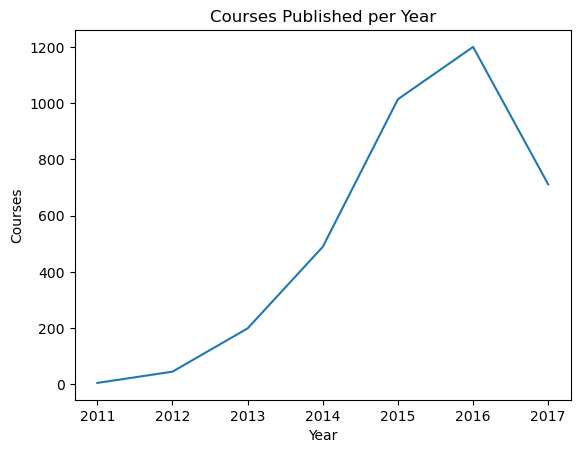

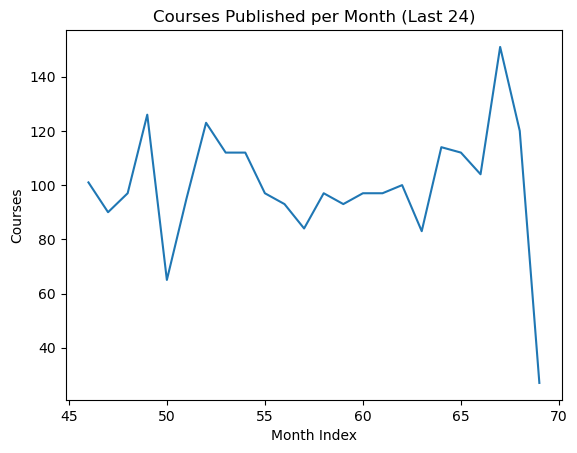

In [11]:
date_col = None
for c in ['published_timestamp','published_time','published_at','published_date','timestamp']:
    if c in df.columns and pd.api.types.is_datetime64_any_dtype(df[c]):
        date_col = c
        break

if date_col:
    ts = df.dropna(subset=[date_col]).copy()
    ts['year'] = ts[date_col].dt.year
    ts['month'] = ts[date_col].dt.to_period('M').astype(str)
    yearly = ts.groupby('year').size().reset_index(name='courses')
    monthly = ts.groupby('month').size().reset_index(name='courses')
    display(yearly)
    display(monthly.tail(24))
    
    # Plot yearly courses
    plt.figure()
    plt.plot(yearly['year'], yearly['courses'])
    plt.title('Courses Published per Year')
    plt.xlabel('Year')
    plt.ylabel('Courses')
    plt.show()

    # Plot last 24 months
    plt.figure()
    # Convert month to ordinal position for plotting
    x = np.arange(len(monthly))
    plt.plot(x[-24:], monthly['courses'].values[-24:])
    plt.title('Courses Published per Month (Last 24)')
    plt.xlabel('Month Index')
    plt.ylabel('Courses')
    plt.show()
else:
    print('No parseable publishing date column detected')

## 8) Pricing bands & enrollment

,price_band,num_subscribers
0,Free,4803.0
1,$0-10,NaN
2,$10-20,384.0
3,$20-50,387.5
4,$50-100,1032.0
5,$100+,1502.0


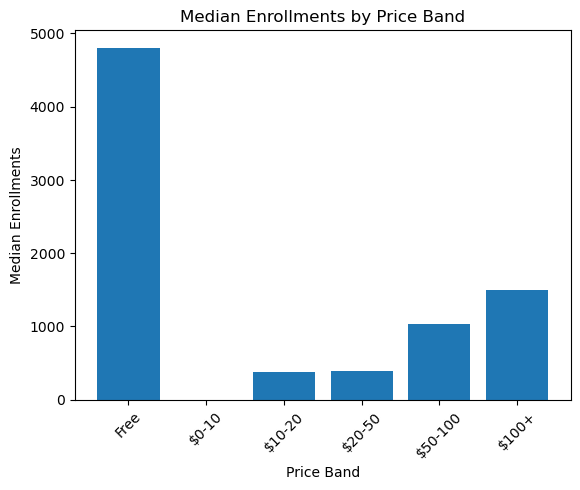

In [12]:
if price_cols and enroll_cols:
    price = pd.to_numeric(df[price_cols[0]], errors='coerce')
    bins = [-0.01, 0, 10, 20, 50, 100, np.inf]
    labels = ['Free','$0-10','$10-20','$20-50','$50-100','$100+']
    df['price_band'] = pd.cut(price, bins=bins, labels=labels)
    band = (df.groupby('price_band')[enroll_cols[0]]
              .median()
              .reset_index()
              .sort_values('price_band'))
    display(band)
    
    # Plot
    plt.figure()
    plt.bar(band['price_band'].astype(str), band[enroll_cols[0]].values)
    plt.title('Median Enrollments by Price Band')
    plt.xlabel('Price Band')
    plt.ylabel('Median Enrollments')
    plt.xticks(rotation=45)
    plt.show()
else:
    print('Price or enrollment columns not found')

## 9) Save clean sample & key tables (optional)

In [17]:
from pathlib import Path

df.to_csv("clean_udemy.csv", index=False)

if 'band' in locals():
    band.to_csv("median_enrollments_by_price_band.csv", index=False)

print("Outputs saved in current directory")

Outputs saved in current directory


## ✅ Conclusion

In this project, we conducted a detailed exploratory data analysis on Udemy course data to understand key factors influencing course performance.

Key insights from the analysis include:
- Course price has a significant impact on enrollments, with lower-priced and free courses generally attracting more subscribers
- Certain price bands perform better in terms of median enrollments
- Course content structure, such as number of lectures and duration, plays an important role in learner engagement
- Data preprocessing and categorization were essential to extract meaningful insights

Overall, this analysis demonstrates how **EDA helps transform raw data into actionable insights**.  
The cleaned dataset and findings from this project can be further used for:
- Predictive modeling
- Course recommendation systems
- Pricing optimization strategies

This project highlights the importance of data-driven decision-making in the online education industry.